# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')
import statsmodels.api as sm

# Import the dataset

In [2]:
df = pd.read_csv('cov_tsa.csv',parse_dates=['REPORT_DATE'])
df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,7844,Oneida,New York,2020-12-13,America,New York Times,1,36065.0,USA,United States,US,237,188
1,1830,Oneida,New York,2020-07-13,America,New York Times,3,36065.0,USA,United States,US,7,104
2,1776,Oneida,New York,2020-07-08,America,New York Times,1,36065.0,USA,United States,US,16,99
3,19215,Oneida,New York,2021-02-16,America,New York Times,2,36065.0,USA,United States,US,29,462
4,676,Oneida,New York,2020-05-12,America,New York Times,1,36065.0,USA,United States,US,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634240,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,MAF,St Martin,MF,0,0
1634241,0,NaN,Macau,2020-01-21,Asia,JHU CSSE Global Timeseries,0,NaN,CHN,China,CN,0,0
1634242,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,BRB,Barbados,BB,0,0
1634243,0,NaN,NaN,2020-01-21,Europe,JHU CSSE Global Timeseries,0,NaN,RUS,Russia,RU,0,0


#### Check for missing data

In [3]:
df.isna().sum()

PEOPLE_POSITIVE_CASES_COUNT             0
COUNTY_NAME                        124931
PROVINCE_STATE_NAME                 98654
REPORT_DATE                             0
CONTINENT_NAME                       1844
DATA_SOURCE_NAME                        0
PEOPLE_DEATH_NEW_COUNT                  0
COUNTY_FIPS_NUMBER                 150747
COUNTRY_ALPHA_3_CODE                 1844
COUNTRY_SHORT_NAME                      0
COUNTRY_ALPHA_2_CODE                 2305
PEOPLE_POSITIVE_NEW_CASES_COUNT         0
PEOPLE_DEATH_COUNT                      0
dtype: int64

###### Remove unwanted columns

In [4]:
cols=['PEOPLE_POSITIVE_CASES_COUNT','COUNTY_NAME','PROVINCE_STATE_NAME','CONTINENT_NAME','DATA_SOURCE_NAME','COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_3_CODE','COUNTRY_ALPHA_2_CODE','PEOPLE_DEATH_COUNT']
df.drop(cols,axis=1,inplace=True)
df.head()

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7


###### Again check for missing data

In [5]:
df.isna().sum()

REPORT_DATE                        0
PEOPLE_DEATH_NEW_COUNT             0
COUNTRY_SHORT_NAME                 0
PEOPLE_POSITIVE_NEW_CASES_COUNT    0
dtype: int64

###### Take only datas of USA

In [6]:
usa = df[df['COUNTRY_SHORT_NAME']=='United States']
usa

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7
...,...,...,...,...
1538886,2020-01-21,0,United States,0
1538887,2020-01-21,0,United States,0
1538888,2020-01-21,0,United States,0
1538889,2020-01-21,0,United States,0


###### Take deaths data

In [7]:
usa_deaths = usa[['REPORT_DATE','PEOPLE_DEATH_NEW_COUNT']]
usa_deaths

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT
0,2020-12-13,1
1,2020-07-13,3
2,2020-07-08,1
3,2021-02-16,2
4,2020-05-12,1
...,...,...
1538886,2020-01-21,0
1538887,2020-01-21,0
1538888,2020-01-21,0
1538889,2020-01-21,0


###### Aggregate the case reports happened on same dates

In [8]:
usa_deaths = usa_deaths.groupby('REPORT_DATE')['PEOPLE_DEATH_NEW_COUNT'].sum().reset_index()
usa_deaths

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
...,...,...
456,2021-04-21,-125
457,2021-04-22,911
458,2021-04-23,873
459,2021-04-24,725


###### Change the index of the dataframe to dates

In [9]:
usa_deaths = usa_deaths.set_index('REPORT_DATE')
usa_deaths

,PEOPLE_DEATH_NEW_COUNT
REPORT_DATE,
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
...,...
2021-04-21,-125
2021-04-22,911
2021-04-23,873


In [10]:
#we found that there is an error in one record .it's given as negative value
usa_deaths.loc['2021-04-21']

PEOPLE_DEATH_NEW_COUNT   -125
Name: 2021-04-21 00:00:00, dtype: int64

In [11]:
usa_deaths.loc['2021-04-21'] = 125

In [12]:
usa_deaths.loc['2021-04-21']

PEOPLE_DEATH_NEW_COUNT    125
Name: 2021-04-21 00:00:00, dtype: int64

###### Check the frequency followed by index dates

In [13]:
usa_deaths.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25'],
              dtype='datetime64[ns]', name='REPORT_DATE', length=461, freq=None)

###### Indicate the frequency is happening by day

In [14]:
usa_deaths.index.freq='D'

In [15]:
usa_deaths.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25'],
              dtype='datetime64[ns]', name='REPORT_DATE', length=461, freq='D')

# Visualization

<AxesSubplot:xlabel='REPORT_DATE'>

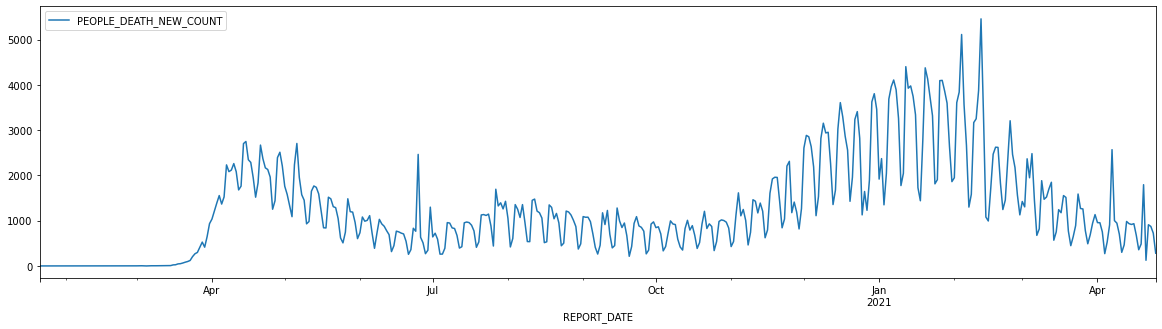

In [16]:
usa_deaths.plot(figsize=(20,5))

# ETS decomposition

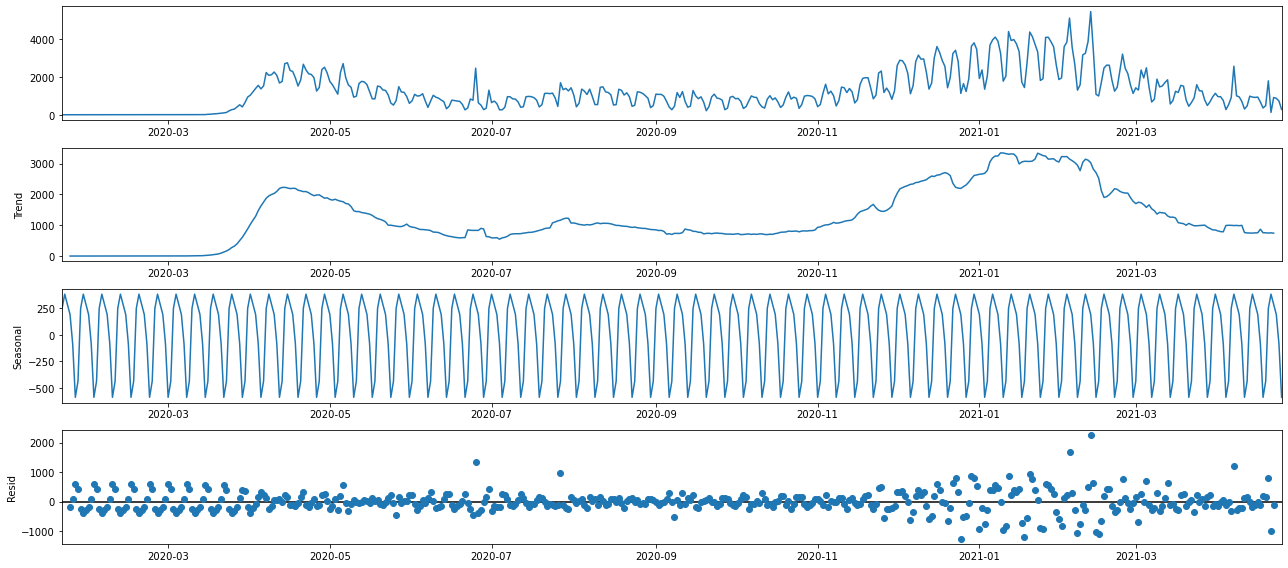

In [17]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition_usa_deaths = sm.tsa.seasonal_decompose(usa_deaths,model='additive')
decomposition_usa_deaths.plot();

### Test for stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [19]:
adf_test(usa_deaths['PEOPLE_DEATH_NEW_COUNT'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.384522
p-value                   0.146153
# lags used              17.000000
# observations          443.000000
critical value (1%)      -3.445198
critical value (5%)      -2.868086
critical value (10%)     -2.570257
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# Train test split

In [20]:
len(usa_deaths)

461

In [21]:
train_usa_deaths = usa_deaths.iloc[:401]
test_usa_deaths = usa_deaths.iloc[401:]

In [22]:
len(test_usa_deaths)

60

# Find the best model

In [23]:
#Now let's use the SARIMAX function
from pmdarima import auto_arima

In [24]:
model_deaths = auto_arima(usa_deaths['PEOPLE_DEATH_NEW_COUNT'],seasonal=True,m=7,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7121.557, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=6869.597, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6982.945, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7119.558, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=7121.705, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=6831.554, Time=0.73 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=6798.279, Time=1.46 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=6797.084, Time=1.04 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=6991.151, Time=0.27 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=6798.024, Time=1.21 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=6935.552, Time=0.37 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=6833.387, Time=0.61 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=6

In [25]:
model_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  461
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -3351.108
Date:                           Tue, 04 May 2021   AIC                           6720.217
Time:                                   15:15:18   BIC                           6757.398
Sample:                                        0   HQIC                          6734.858
                                           - 461                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0785      0.110      0.717      0.474      -0.136       0.293
ar.L2         -0.1524      0.057     -2.654      0.008      -0.265      -0.040
ar.L3         -0.1912      0.061     -3.144      0.002      -0.310      -0.072
ar.L4         -0.1628      0.049     -3.313      0.001      -0.259      -0.067
ar.L5         -0.1289      0.059     -2.183      0.029      -0.245      -0.013
ma.L1         -0.5587      0.109     -5.149      0.000      -0.771      -0.346
ar.S.L7        0.9388      0.019     48.893      0.000       0.901       0.976
ma.S.L7       -0.6815      0.044    -15.651      0.000      -0.767      -0.596
sigma2      1.229e+05   3907.303     31.465      0.000    1.15e+05    1.31e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1208.29
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               6.30   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model_deaths

ARIMA(order=(5, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

# Train the model

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
model_deaths = SARIMAX(train_usa_deaths['PEOPLE_DEATH_NEW_COUNT'],order=(5, 1, 1),seasonal_order=(1, 0, 1, 7),enforce_invertibility=False)

In [29]:
result_deaths = model_deaths.fit()

In [30]:
result_deaths.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:            PEOPLE_DEATH_NEW_COUNT   No. Observations:                  401
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2893.138
Date:                           Tue, 04 May 2021   AIC                           5804.276
Time:                                   15:15:19   BIC                           5840.200
Sample:                               01-21-2020   HQIC                          5818.502
                                    - 02-24-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1861      0.138      1.348      0.178      -0.085       0.457
ar.L2         -0.1608      0.057     -2.841      0.005      -0.272      -0.050
ar.L3         -0.1263      0.069     -1.830      0.067      -0.262       0.009
ar.L4         -0.1637      0.050     -3.294      0.001      -0.261      -0.066
ar.L5         -0.0909      0.064     -1.409      0.159      -0.217       0.035
ma.L1         -0.5624      0.135     -4.151      0.000      -0.828      -0.297
ar.S.L7        0.9616      0.021     46.034      0.000       0.921       1.003
ma.S.L7       -0.6913      0.049    -14.119      0.000      -0.787      -0.595
sigma2        1.1e+05   3493.249     31.480      0.000    1.03e+05    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1576.99
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               5.21   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#Now we can predict the values into the future
start = len(train_usa_deaths)
end = len(train_usa_deaths) + len(test_usa_deaths) - 1

In [32]:
prediction_deaths = result_deaths.predict(start,end).rename('SARIMA model')

<AxesSubplot:xlabel='REPORT_DATE'>

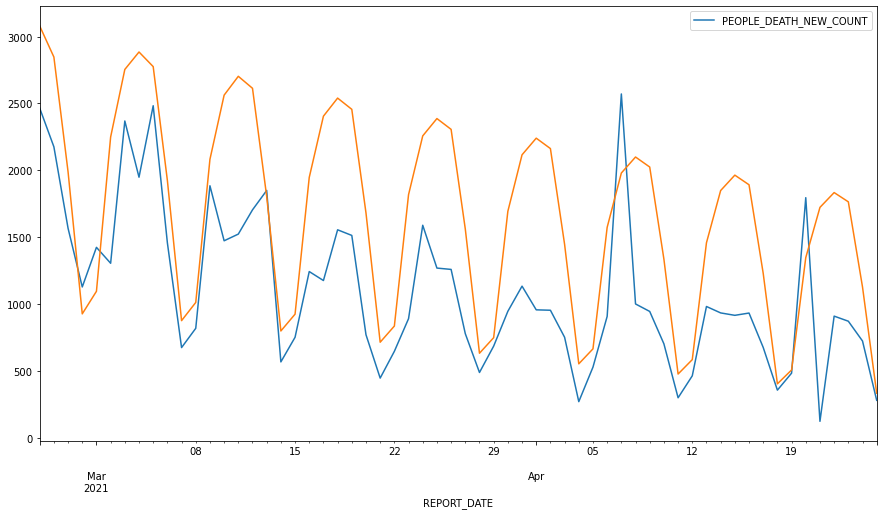

In [33]:
test_usa_deaths['PEOPLE_DEATH_NEW_COUNT'].plot(legend=True,figsize=(15,8))
prediction_deaths.plot()

# Forecast into unknown future

In [34]:
model_deaths_fc = SARIMAX(usa_deaths['PEOPLE_DEATH_NEW_COUNT'],order=(4, 1, 1),seasonal_order=(2, 0, 2, 7),enforce_invertibility=False)

In [35]:
result_deaths_fc = model_deaths_fc.fit()

C:\Users\fawas\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
fcast_deaths = result_deaths_fc.predict(len(usa_deaths),len(usa_deaths)+60,typ='levels').rename('SARIMA forecast')

<AxesSubplot:xlabel='REPORT_DATE'>

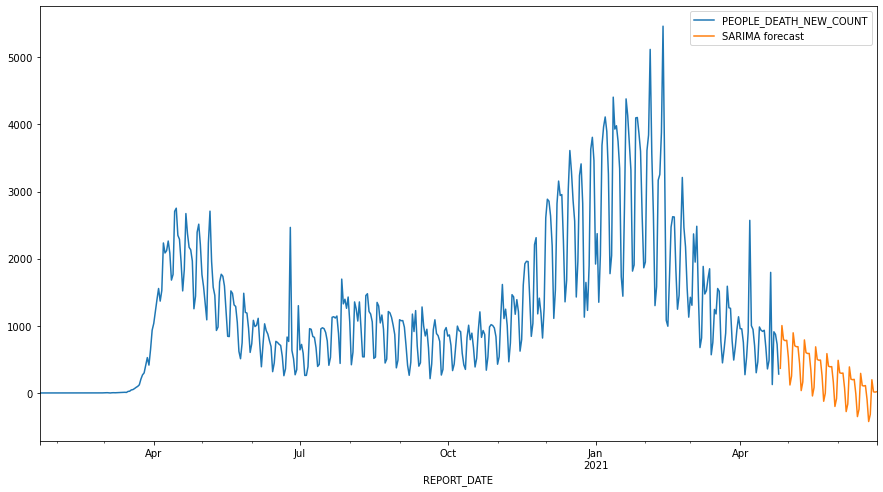

In [37]:
usa_deaths['PEOPLE_DEATH_NEW_COUNT'].plot(legend=True,figsize=(15,8))
fcast_deaths.plot(legend=True)